21.03.08 Python 데이터프레임과 시리즈_Pandas

# CH12 데이터프레임과 시리즈(Pandas)_1절~7절

# 1절. 판다스 패키지
- 1차원 구조를 갖는 시리즈, 2차원 구조를 갖는 데이터프레임 제공
- 결측치 처리, 크기변경(열삽입,열삭제), 원하는 부분 슬라이싱, 데이터 분할, 병합, 구조변경, 데이터 정렬, 파일 입출력 등이 용이
- https://pipi.python.org/pypi/pandas - pakage index

In [1]:
import pandas as pd
data = pd.read_json('data/ch09_member2.json', encoding='UTF-8')
data

,name,age,email,address
0,홍길동,20,hong@kildong,서울
1,박길동,30,park@kildong,경기
2,김길동,50,kim@kildong,부산


In [2]:
type(data)

pandas.core.frame.DataFrame

# 2절. 데이터 프레임 만들기

## 2.1 딕셔너리를 이용한 데이터프레임 만들기

In [4]:
d = {'col1':[1,2], 'col2':[3,4]}
df = pd.DataFrame(data=d)
df

,col1,col2
0,1,3
1,2,4


In [5]:
d = [{'col1':1, 'col2':3},{'col1':2,'col2':4}]
df = pd.DataFrame(data=d)
df

,col1,col2
0,1,3
1,2,4


In [6]:
d = [{'col1':1, 'col2':3},{'col1':2,'col2':4},{'col2':9}]
df = pd.DataFrame(data=d)
df

,col1,col2
0,1.0,3
1,2.0,4
2,NaN,9


## 2.2 리스트를 이용해 데이터 프레임 만들기

In [15]:
kor = [100,95,93,94,105]
math = [90,95,82,93,60]
df = pd.DataFrame({'kor':kor, 'math':math})
df

,kor,math
0,100,90
1,95,95
2,93,82
3,94,93
4,105,60


In [16]:
import numpy as np
df = pd.DataFrame(np.c_[kor, math], columns=['kor','math'])
df

,kor,math
0,100,90
1,95,95
2,93,82
3,94,93
4,105,60


In [17]:
np.c_[kor,math]

array([[100,  90],
       [ 95,  95],
       [ 93,  82],
       [ 94,  93],
       [105,  60]])

In [19]:
np.c_[[kor],[math]]

array([[100,  95,  93,  94, 105,  90,  95,  82,  93,  60]])

In [56]:
pd.DataFrame(np.c_[[kor],[math]], 
            columns=['score1','score2','score3','score4','score5','score6',
                    'score7','score8','score9','score10'])

,score1,score2,score3,score4,score5,score6,score7,score8,score9,score10
0,100,95,93,94,105,90,95,82,93,60


## 2.3 read_csv()

In [26]:
df = pd.read_csv('data/상가업소정보_201912_01.csv',sep='|', encoding='utf-8')
df.head()

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,19905471,와라와라호프,NaN,Q,음식,Q09,유흥주점,Q09A01,호프/맥주,I56219,...,1168010600106040000014378,대치상가,서울특별시 강남구 남부순환로 2933,135280,6280.0,NaN,1,NaN,127.061026,37.493922
1,19911397,커피빈코리아선릉로93길점,코리아선릉로93길점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,1168010100106960042022041,NaN,서울특별시 강남구 선릉로93길 6,135080,6149.0,NaN,1,NaN,127.047883,37.505675
2,19911801,프로포즈,NaN,Q,음식,Q09,유흥주점,Q09A01,호프/맥주,I56219,...,1154510200101620001017748,NaN,서울특별시 금천구 가산로 34-6,153010,8545.0,NaN,1,NaN,126.899220,37.471711
3,19912201,싱싱커피&토스트,NaN,Q,음식,Q07,패스트푸드,Q07A10,토스트전문,I56192,...,2653010400105780000002037,산업용품유통상가,부산광역시 사상구 괘감로 37,617726,46977.0,NaN,1,26,128.980455,35.159774
4,19932756,가락사우나내스낵,NaN,F,생활서비스,F09,대중목욕탕/휴게,F09A02,사우나/증기탕/온천,S96121,...,1171010500102560005010490,NaN,서울특별시 송파구 가락로 71,138846,5690.0,NaN,1,NaN,127.104071,37.500249


In [29]:
pd.options.display.max_columns # 최대로 출력될 수 있는 컬럼수

20

In [30]:
pd.options.display.max_columns # 최대 39로 출력
df.head(3)

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,19905471,와라와라호프,NaN,Q,음식,Q09,유흥주점,Q09A01,호프/맥주,I56219,...,1168010600106040000014378,대치상가,서울특별시 강남구 남부순환로 2933,135280,6280.0,NaN,1,NaN,127.061026,37.493922
1,19911397,커피빈코리아선릉로93길점,코리아선릉로93길점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,1168010100106960042022041,NaN,서울특별시 강남구 선릉로93길 6,135080,6149.0,NaN,1,NaN,127.047883,37.505675
2,19911801,프로포즈,NaN,Q,음식,Q09,유흥주점,Q09A01,호프/맥주,I56219,...,1154510200101620001017748,NaN,서울특별시 금천구 가산로 34-6,153010,8545.0,NaN,1,NaN,126.899220,37.471711


- csv 파일로 읽어오기

In [32]:
member_df = pd.read_csv('data/ch12_member_data.csv',sep=',',encoding='utf-8')
member_df

,Name,Age,Email,Address
0,홀길동,20,kildong@hong.com,서울시 강동구
1,김길동,40,kildong@kim.com,서울시 강서구
2,박길동,30,kildong@park.com,서울시 강북구
3,신길동,50,kildong@shin.com,서울시 강남구
4,#이길동,60,kildong@lee.com,서울시 중구


In [33]:
member_df = pd.read_csv('data/ch12_member_data.csv',sep=',',encoding='utf-8', comment='#')
member_df # 주석행 지정 후 출력

,Name,Age,Email,Address
0,홀길동,20,kildong@hong.com,서울시 강동구
1,김길동,40,kildong@kim.com,서울시 강서구
2,박길동,30,kildong@park.com,서울시 강북구
3,신길동,50,kildong@shin.com,서울시 강남구


In [34]:
type(member_df) # 2차원 데이터 : DataFrame

pandas.core.frame.DataFrame

In [35]:
type(member_df['Name']) # 1차원 데이터 : Series

pandas.core.series.Series

In [38]:
# 원하는 행 제외하고 읽어오기
member_df = pd.read_csv('data/ch12_member_data.csv', comment='#', skiprows=[1,1,3])
member_df

,Name,Age,Email,Address
0,김길동,40,kildong@kim.com,서울시 강서구
1,신길동,50,kildong@shin.com,서울시 강남구


## 2.4 sklearn.datasets 모듈 데이터를 데이터 프레임으로 변환하기
- sklearn 패키지에는 학습을 위한 많은 데이터셋 제공, 딕셔너리 형태로 제공

In [40]:
from sklearn import datasets

In [41]:
iris = datasets.load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [44]:
iris['feature_names'] # 독립 변수의 columes
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [45]:
iris['data'] # 독립 변수
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [46]:
iris['target'] # 원핫 인코딩이 된 종속변수
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [47]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [50]:
# 사람이 알아보기 쉬운 원핫 인코딩 종속변수
iris.target_names[iris.target]

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolo

In [53]:
x = pd.DataFrame(iris.data, columns=iris.feature_names)
x

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [55]:
[col.sub(0,12) for col in  x.columns]

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [57]:
x.columns = [col[0:12].strip().replace(' ','_') for col in x.columns]
x # 독립변수

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [59]:
y = pd.DataFrame(iris.target_names[iris.target], columns=['species'])
y # 종속변수

,species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa
...,...
145,virginica
146,virginica
147,virginica
148,virginica


In [63]:
iris = pd.concat([x,y], axis=1) # 열병합
iris.head(2)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa


In [64]:
iris = pd.concat([x,y], axis=1) # 열병합
iris.head(-148)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa


In [65]:
iris.shape

(150, 5)

In [67]:
iris.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


# 3절. 이름 지정하기(열, 행)

## 3.1 열이름 지정하기

In [68]:
member_df = pd.read_csv('data/ch12_member_data.csv', comment='#')
member_df

,Name,Age,Email,Address
0,홀길동,20,kildong@hong.com,서울시 강동구
1,김길동,40,kildong@kim.com,서울시 강서구
2,박길동,30,kildong@park.com,서울시 강북구
3,신길동,50,kildong@shin.com,서울시 강남구


In [70]:
member_df.columns = ['이름','나이','이메일','주소']
member_df

,이름,나이,이메일,주소
0,홀길동,20,kildong@hong.com,서울시 강동구
1,김길동,40,kildong@kim.com,서울시 강서구
2,박길동,30,kildong@park.com,서울시 강북구
3,신길동,50,kildong@shin.com,서울시 강남구


## 3.2 행이름 지정하기

In [74]:
member_df.index = ['홍','김','박','신']
member_df

,이름,나이,이메일,주소
홍,홀길동,20,kildong@hong.com,서울시 강동구
김,김길동,40,kildong@kim.com,서울시 강서구
박,박길동,30,kildong@park.com,서울시 강북구
신,신길동,50,kildong@shin.com,서울시 강남구


In [76]:
member_df.loc[['홍','신'],'이름']

홍    홀길동
신    신길동
Name: 이름, dtype: object

## 3.3 레벨이름 지정하기

In [85]:
member_df.columns = [['기본정보','기본정보','추가정보','추가정보'],
                    ['이름', '나이', '이메일', '주소']]
member_df.columns.names = ['대분류','소분류']
member_df


대분류 기본정보                  추가정보         
소분류   이름  나이               이메일       주소
0    홀길동  20  kildong@hong.com  서울시 강동구
1    김길동  40   kildong@kim.com  서울시 강서구
2    박길동  30  kildong@park.com  서울시 강남구
3    신길동  50  kildong@shin.com  서울시 강북구

In [86]:
member_df.index = [['좌우','좌우','상하','상하'],
                  ['동','서','남','북']]
member_df

대분류  기본정보                  추가정보         
소분류    이름  나이               이메일       주소
좌우 동  홀길동  20  kildong@hong.com  서울시 강동구
   서  김길동  40   kildong@kim.com  서울시 강서구
상하 남  박길동  30  kildong@park.com  서울시 강남구
   북  신길동  50  kildong@shin.com  서울시 강북구

In [87]:
#columes 나 index에 레벨을 두면 데이터를 조회하기 불편하다.
member_df.loc['상하','기본정보']['이름']['남']

'박길동'

# 4절. 부분 데이터 조회

In [92]:
member_df = pd.read_csv('data/ch12_member_data.csv', comment='#')
member_df

,Name,Age,Email,Address
0,홀길동,20,kildong@hong.com,서울시 강동구
1,김길동,40,kildong@kim.com,서울시 강서구
2,박길동,30,kildong@park.com,서울시 강남구
3,신길동,50,kildong@shin.com,서울시 강북구


## 4.1 단일열 조회

In [94]:
member_df.Name

0    홀길동
1    김길동
2    박길동
3    신길동
Name: Name, dtype: object

In [95]:
member_df['Name']

0    홀길동
1    김길동
2    박길동
3    신길동
Name: Name, dtype: object

In [97]:
# 데이터 프레임을 읽는다.
member_df.shape

(4, 4)

In [98]:
member_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Name     4 non-null      object
 1   Age      4 non-null      int64 
 2   Email    4 non-null      object
 3   Address  4 non-null      object
dtypes: int64(1), object(3)
memory usage: 256.0+ bytes


In [101]:
pd.to_numeric(member_df['Age'], errors='coerce') # 문자인 '나이' 필드를 숫자로 바꾸고 에러는 무시

0    20
1    40
2    30
3    50
Name: Age, dtype: int64

In [102]:
member_df.isnull() # 결측치 확인

,Name,Age,Email,Address
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False


In [103]:
False == 0

True

In [104]:
True == 1

True

In [105]:
False + False + False + True # True가 하나만 있어도 1로 결과 출력

1

In [106]:
member_df.isnull().sum() # 열별 결측치 수

Name       0
Age        0
Email      0
Address    0
dtype: int64

In [107]:
member_df.isna() # 결측치면 True, 결측치가 아니면 False

,Name,Age,Email,Address
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False


In [108]:
member_df.isna().sum() # 열별 결측치 수

Name       0
Age        0
Email      0
Address    0
dtype: int64

In [111]:
type(member_df['Name']) # 데이터프레임에서 단일열은 시리즈(series)이다.

pandas.core.series.Series

In [110]:
member_df['Name']  # dtype의 요소

0    홀길동
1    김길동
2    박길동
3    신길동
Name: Name, dtype: object

## 4.2 loc를 이용한 조회(columes, indax로 조회)

In [113]:
member_df.index = ['동','서','남','북']
member_df

,Name,Age,Email,Address
동,홀길동,20,kildong@hong.com,서울시 강동구
서,김길동,40,kildong@kim.com,서울시 강서구
남,박길동,30,kildong@park.com,서울시 강남구
북,신길동,50,kildong@shin.com,서울시 강북구


In [116]:
member_df.loc[:,'Name':'Email'] # 모든 행의 이름, 나이, 이메일

,Name,Age,Email
동,홀길동,20,kildong@hong.com
서,김길동,40,kildong@kim.com
남,박길동,30,kildong@park.com
북,신길동,50,kildong@shin.com


In [117]:
member_df.loc[:,['Name','Email']] # 모든 행의 이름, 이메일

,Name,Email
동,홀길동,kildong@hong.com
서,김길동,kildong@kim.com
남,박길동,kildong@park.com
북,신길동,kildong@shin.com


In [118]:
member_df.loc[['동','서','남'],['Name','Address']]

,Name,Address
동,홀길동,서울시 강동구
서,김길동,서울시 강서구
남,박길동,서울시 강남구


In [119]:
member_df.loc['동':'남',['Name','Address']] # '동' ~ '남' 행까지('남'포함)

,Name,Address
동,홀길동,서울시 강동구
서,김길동,서울시 강서구
남,박길동,서울시 강남구


In [121]:
member_df.loc['동':'남','Name':'Email']

,Name,Age,Email
동,홀길동,20,kildong@hong.com
서,김길동,40,kildong@kim.com
남,박길동,30,kildong@park.com


In [124]:
# loc안에는 columes 이름, index 이름 등 조건
member_df.loc[member_df.Age>25]

,Name,Age,Email,Address
서,김길동,40,kildong@kim.com,서울시 강서구
남,박길동,30,kildong@park.com,서울시 강남구
북,신길동,50,kildong@shin.com,서울시 강북구


## 4.3 iloc을 이용한 조회(정수로 조회)
- iloc[ from, to, by]는 정수를 이용해서 데이터 셋 조회
- from부터 by씩 증가하여 to 전까지 (to 미포함)
- from, to, by는 음수 가능, 음수 인텍스 번호는 뒤부터

In [125]:
member_df.iloc[1:3, 1:3]

,Age,Email
서,40,kildong@kim.com
남,30,kildong@park.com


In [126]:
member_df.iloc[1,1:3]

Age                   40
Email    kildong@kim.com
Name: 서, dtype: object

In [127]:
member_df.iloc[2] # 열 인덱스번호가 생략되면 전체 열을 의미

Name                    박길동
Age                      30
Email      kildong@park.com
Address             서울시 강남구
Name: 남, dtype: object

In [129]:
member_df.iloc[-2, 0:2]

Name    박길동
Age      30
Name: 남, dtype: object

In [133]:
member_df.iloc[::-1, ::-1] # 열과 행 모두 거꾸로 출력

,Address,Email,Age,Name
북,서울시 강북구,kildong@shin.com,50,신길동
남,서울시 강남구,kildong@park.com,30,박길동
서,서울시 강서구,kildong@kim.com,40,김길동
동,서울시 강동구,kildong@hong.com,20,홀길동


In [134]:
member_df.iloc[[0,3],[0,1,3]]

,Name,Age,Address
동,홀길동,20,서울시 강동구
북,신길동,50,서울시 강북구


## 4.4 조건으로 조회하기

In [140]:
# iris 데이터 가져오는 방법 1.
from sklearn import datasets
iris = datasets.load_iris() # 딕셔너리
x = pd.DataFrame(iris['data'], columns=iris.feature_names)
y = pd.DataFrame(iris.taget_names[iris.taget], columns=['species'])
iris = pd.concat([x,y], axis=1)
iris_df

AttributeError: taget_names

In [141]:
# iris 데이터 가져오는 방법 2.
import seaborn as sns
iris_df = sns.load_dataset('iris')
iris_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [142]:
# iris 데이터 가져오는 방법 3.
# statemodels 패키지를 통해 R 데이터 셋 가져오기
# get_rdataset() 함수로 R패키지 데이터 셋을 가져온다.
import statsmodels.api as sm
iris = sm.datasets.get_rdataset('iris', package='datasets')
iris_df = iris.data
iris_df

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [143]:
iris_df.iloc[0:5, :-1] # 독립변수 top5 행만

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [144]:
iris_df.iloc[:,-1] # 종속 변수만

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: Species, Length: 150, dtype: object

In [146]:
iris_df.loc[iris_df.Species=='virginica'].head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
100,6.3,3.3,6.0,2.5,virginica
101,5.8,2.7,5.1,1.9,virginica
102,7.1,3.0,5.9,2.1,virginica
103,6.3,2.9,5.6,1.8,virginica
104,6.5,3.0,5.8,2.2,virginica


In [147]:
iris_df.loc[iris_df['Species']=='virginica'].head() # virginica 종의 모든행 출력

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
100,6.3,3.3,6.0,2.5,virginica
101,5.8,2.7,5.1,1.9,virginica
102,7.1,3.0,5.9,2.1,virginica
103,6.3,2.9,5.6,1.8,virginica
104,6.5,3.0,5.8,2.2,virginica


In [148]:
iris_df.loc[iris_df['Species']=='virginica',
            ['Sepal.Length','Sepal.Width','Species']].head() # virginica 종의 특정열 출력

,Sepal.Length,Sepal.Width,Species
100,6.3,3.3,virginica
101,5.8,2.7,virginica
102,7.1,3.0,virginica
103,6.3,2.9,virginica
104,6.5,3.0,virginica


In [ ]:
# 종이 verginica이고 Sepal.Length 가 6.5 이상인 데이터만 모든열 조회

In [153]:
iris_df.loc[(iris_df.Species=='virginica')& (iris_df['Sepal.Length'] >= 7.0)]

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
102,7.1,3.0,5.9,2.1,virginica
105,7.6,3.0,6.6,2.1,virginica
107,7.3,2.9,6.3,1.8,virginica
109,7.2,3.6,6.1,2.5,virginica
117,7.7,3.8,6.7,2.2,virginica
118,7.7,2.6,6.9,2.3,virginica
122,7.7,2.8,6.7,2.0,virginica
125,7.2,3.2,6.0,1.8,virginica
129,7.2,3.0,5.8,1.6,virginica
130,7.4,2.8,6.1,1.9,virginica


# 5절. 데이터 추가 및 삭제

## 5.1 데이터 프레임 요소 삭제

In [167]:
member_df = pd.read_csv('data/ch12_member_data.csv',comment='#')
member_df

,Name,Age,Email,Address
0,홀길동,20,kildong@hong.com,서울시 강동구
1,김길동,40,kildong@kim.com,서울시 강서구
2,박길동,30,kildong@park.com,서울시 강남구
3,신길동,50,kildong@shin.com,서울시 강북구


1) 단일행 삭제하기 

In [163]:
member_df = member_df.drop(3, axis=0) # axis = 0 생략가능, 행에서 찾아서 삭제
                                      # member_df에서 삭제 되지는 않음  
                                      # 없는 행 삭제시 에러발생

In [164]:
member_df

,Name,Age,Email,Address
0,홀길동,20,kildong@hong.com,서울시 강동구
1,김길동,40,kildong@kim.com,서울시 강서구
2,박길동,30,kildong@park.com,서울시 강남구


In [165]:
member_df.drop(2, inplace=True) # inplace=True이면 member_df 데이터 셋에서 drop

In [166]:
member_df

,Name,Age,Email,Address
0,홀길동,20,kildong@hong.com,서울시 강동구
1,김길동,40,kildong@kim.com,서울시 강서구


In [187]:
member_df = pd.read_csv('data/ch12_member_data.csv',comment='#')
member_df.index = ['동','서','남','북']
member_df

,Name,Age,Email,Address
동,홀길동,20,kildong@hong.com,서울시 강동구
서,김길동,40,kildong@kim.com,서울시 강서구
남,박길동,30,kildong@park.com,서울시 강남구
북,신길동,50,kildong@shin.com,서울시 강북구


In [179]:
member_df.drop('서', axis=0) # axis=0이면 북은 index의 행을 삭제한 데이터를 반환

,Name,Age,Email,Address
동,홀길동,20,kildong@hong.com,서울시 강동구
남,박길동,30,kildong@park.com,서울시 강남구
북,신길동,50,kildong@shin.com,서울시 강북구


In [188]:
member_df.drop('북', inplace=True)
member_df

,Name,Age,Email,Address
동,홀길동,20,kildong@hong.com,서울시 강동구
서,김길동,40,kildong@kim.com,서울시 강서구
남,박길동,30,kildong@park.com,서울시 강남구


2) 단일 열 삭제하기

In [184]:
member_df.drop('Email', axis=1, inplace=True) # axis = 1 해당열을 삭제한 데이터 셋을 반환

,Name,Age,Address
동,홀길동,20,서울시 강동구
서,김길동,40,서울시 강서구
남,박길동,30,서울시 강남구


In [191]:
member_df = pd.read_csv('data/ch12_member_data.csv',comment='#')
member_df.index = ['동','서','남','북']

3) 여러 행과 열 삭제

In [192]:
member_df = member_df.drop(labels=['동','북'])

In [193]:
member_df

,Name,Age,Email,Address
서,김길동,40,kildong@kim.com,서울시 강서구
남,박길동,30,kildong@park.com,서울시 강남구


In [196]:
member_df.drop(labels=['Age','Email','Address'], axis=1)

,Name
서,김길동
남,박길동


## 5.2 데이터 프레임의 요소추가

1) 열 추가

In [197]:
member_df = pd.read_csv('data/ch12_member_data.csv', comment='#')
member_df

,Name,Age,Email,Address
0,홀길동,20,kildong@hong.com,서울시 강동구
1,김길동,40,kildong@kim.com,서울시 강서구
2,박길동,30,kildong@park.com,서울시 강남구
3,신길동,50,kildong@shin.com,서울시 강북구


In [199]:
member_df['BirthYear'] = 2021 - member_df['Age'] + 1 # 특정열을 이용하여 새로운 열 생성
member_df

,Name,Age,Email,Address,BirthYear
0,홀길동,20,kildong@hong.com,서울시 강동구,2002
1,김길동,40,kildong@kim.com,서울시 강서구,1982
2,박길동,30,kildong@park.com,서울시 강남구,1992
3,신길동,50,kildong@shin.com,서울시 강북구,1972


In [200]:
member_df['BirthYear'] = 2000 # 모든행에 2000을 삽입
member_df

,Name,Age,Email,Address,BirthYear
0,홀길동,20,kildong@hong.com,서울시 강동구,2000
1,김길동,40,kildong@kim.com,서울시 강서구,2000
2,박길동,30,kildong@park.com,서울시 강남구,2000
3,신길동,50,kildong@shin.com,서울시 강북구,2000


In [201]:
member_df = pd.read_csv('data/ch12_member_data.csv', comment='#')
member_df

,Name,Age,Email,Address
0,홀길동,20,kildong@hong.com,서울시 강동구
1,김길동,40,kildong@kim.com,서울시 강서구
2,박길동,30,kildong@park.com,서울시 강남구
3,신길동,50,kildong@shin.com,서울시 강북구


In [202]:
member_df['BirthYear'] = [2001,1993,1983,1985] # 추가할 열에 각각의 값을 입력
member_df

,Name,Age,Email,Address,BirthYear
0,홀길동,20,kildong@hong.com,서울시 강동구,2001
1,김길동,40,kildong@kim.com,서울시 강서구,1993
2,박길동,30,kildong@park.com,서울시 강남구,1983
3,신길동,50,kildong@shin.com,서울시 강북구,1985


In [204]:
member_df = pd.read_csv('data/ch12_member_data.csv', comment='#')
member_df['BirthYear'] = [2001,1993,1983,None]
member_df

,Name,Age,Email,Address,BirthYear
0,홀길동,20,kildong@hong.com,서울시 강동구,2001.0
1,김길동,40,kildong@kim.com,서울시 강서구,1993.0
2,박길동,30,kildong@park.com,서울시 강남구,1983.0
3,신길동,50,kildong@shin.com,서울시 강북구,NaN


In [205]:
import numpy as np
np.nan

nan

In [207]:
type(np.nan)

float

2) 행 추가하기

In [208]:
# 핼 추가 방법 1. 시리즈(Series)를 이용한 행추가
member_df = pd.read_csv('data/ch12_member_data.csv', comment='#')
member_df

,Name,Age,Email,Address
0,홀길동,20,kildong@hong.com,서울시 강동구
1,김길동,40,kildong@kim.com,서울시 강서구
2,박길동,30,kildong@park.com,서울시 강남구
3,신길동,50,kildong@shin.com,서울시 강북구


In [214]:
# 시리즈 데이터를 이용한 열추가
pd.Series([2001,1995,1996], index=[0,2,3])

0    2001
2    1995
3    1996
dtype: int64

In [215]:
member_df['BirthYear'] = pd.Series([2001,1995,1996], index=[0,2,3])
member_df

,Name,Age,Email,Address,BirthYear
0,홀길동,20,kildong@hong.com,서울시 강동구,2001.0
1,김길동,40,kildong@kim.com,서울시 강서구,NaN
2,박길동,30,kildong@park.com,서울시 강남구,1995.0
3,신길동,50,kildong@shin.com,서울시 강북구,1996.0
4,홍길중,28,middle@hong.com,서울시 중구,NaN


In [211]:
# 행 추가 방법 1. Series를 이용 방법
new_member = pd.Series(['홍길중', 28, 'middle@hong.com','서울시 중구'],
                      index=member_df.columns)
new_member

Name                   홍길중
Age                     28
Email      middle@hong.com
Address             서울시 중구
dtype: object

In [212]:
member_df.append(new_member, ignore_index=True) # 추가된 결과만 반환되며 추가된 결과는 저장되지 않는다.

,Name,Age,Email,Address
0,홀길동,20,kildong@hong.com,서울시 강동구
1,김길동,40,kildong@kim.com,서울시 강서구
2,박길동,30,kildong@park.com,서울시 강남구
3,신길동,50,kildong@shin.com,서울시 강북구
4,홍길중,28,middle@hong.com,서울시 중구


In [213]:
member_df = member_df.append(new_member, ignore_index=True)
member_df

,Name,Age,Email,Address
0,홀길동,20,kildong@hong.com,서울시 강동구
1,김길동,40,kildong@kim.com,서울시 강서구
2,박길동,30,kildong@park.com,서울시 강남구
3,신길동,50,kildong@shin.com,서울시 강북구
4,홍길중,28,middle@hong.com,서울시 중구


In [ ]:
# 행 추가 방법 2. 딕셔너리를 이용한 행추가 방법

In [216]:
new_member = {'Name':'최길동','Age':35,'Email':'choi@kildong.com','Address':'서울시 은평구',
             'BirthYear':1986}
member_df.append(new_member, ignore_index=True) # member_df에 반영은 안함

,Name,Age,Email,Address,BirthYear
0,홀길동,20,kildong@hong.com,서울시 강동구,2001.0
1,김길동,40,kildong@kim.com,서울시 강서구,NaN
2,박길동,30,kildong@park.com,서울시 강남구,1995.0
3,신길동,50,kildong@shin.com,서울시 강북구,1996.0
4,홍길중,28,middle@hong.com,서울시 중구,NaN
5,최길동,35,choi@kildong.com,서울시 은평구,1986.0


In [217]:
member_df = member_df.append(new_member, ignore_index=True)

In [218]:
# 행추가 방법 3. 데이터 프레임을 활용한 행추가(여러 행을 한번에 추가)
new_member = pd.DataFrame({"Name":["이순신"],
                          "Age":[31],
                          "Email":["lee@sunshin.com"],
                          "Address":['전남 여수'],
                          "BirthYear":[1991]})
new_member

,Name,Age,Email,Address,BirthYear
0,이순신,31,lee@sunshin.com,전남 여수,1991


In [221]:
new_df = member_df.append(new_member) # 데이터프레임을 통해 추가할 경우 index를 다시 재조정
new_df.index = range(len(new_df))
new_df

,Name,Age,Email,Address,BirthYear
0,홀길동,20,kildong@hong.com,서울시 강동구,2001.0
1,김길동,40,kildong@kim.com,서울시 강서구,NaN
2,박길동,30,kildong@park.com,서울시 강남구,1995.0
3,신길동,50,kildong@shin.com,서울시 강북구,1996.0
4,홍길중,28,middle@hong.com,서울시 중구,NaN
5,최길동,35,choi@kildong.com,서울시 은평구,1986.0
6,이순신,31,lee@sunshin.com,전남 여수,1991.0


# 6절. 정렬

## 6.1 행이름(index)으로 정렬

In [223]:
member_df.index = ['동','서','남','북','인','중']
member_df

,Name,Age,Email,Address,BirthYear
동,홀길동,20,kildong@hong.com,서울시 강동구,2001.0
서,김길동,40,kildong@kim.com,서울시 강서구,NaN
남,박길동,30,kildong@park.com,서울시 강남구,1995.0
북,신길동,50,kildong@shin.com,서울시 강북구,1996.0
인,홍길중,28,middle@hong.com,서울시 중구,NaN
중,최길동,35,choi@kildong.com,서울시 은평구,1986.0


In [224]:
member_df.sort_index() # 정렬된 데이터를 반환할 뿐 memner_df에는 반영되지 않는다.

,Name,Age,Email,Address,BirthYear
남,박길동,30,kildong@park.com,서울시 강남구,1995.0
동,홀길동,20,kildong@hong.com,서울시 강동구,2001.0
북,신길동,50,kildong@shin.com,서울시 강북구,1996.0
서,김길동,40,kildong@kim.com,서울시 강서구,NaN
인,홍길중,28,middle@hong.com,서울시 중구,NaN
중,최길동,35,choi@kildong.com,서울시 은평구,1986.0


In [226]:
member_df.sort_index(inplace=True, axis=0) # 정렬된 값을 member_df에 반영
member_df

,Name,Age,Email,Address,BirthYear
남,박길동,30,kildong@park.com,서울시 강남구,1995.0
동,홀길동,20,kildong@hong.com,서울시 강동구,2001.0
북,신길동,50,kildong@shin.com,서울시 강북구,1996.0
서,김길동,40,kildong@kim.com,서울시 강서구,NaN
인,홍길중,28,middle@hong.com,서울시 중구,NaN
중,최길동,35,choi@kildong.com,서울시 은평구,1986.0


## 6.2 열이름(columes)으로 정렬

In [227]:
member_df.sort_index(axis=1)

,Address,Age,BirthYear,Email,Name
남,서울시 강남구,30,1995.0,kildong@park.com,박길동
동,서울시 강동구,20,2001.0,kildong@hong.com,홀길동
북,서울시 강북구,50,1996.0,kildong@shin.com,신길동
서,서울시 강서구,40,NaN,kildong@kim.com,김길동
인,서울시 중구,28,NaN,middle@hong.com,홍길중
중,서울시 은평구,35,1986.0,choi@kildong.com,최길동


In [228]:
member_df # 데이터프레임 데이터셋에는 반영 안됨

,Name,Age,Email,Address,BirthYear
남,박길동,30,kildong@park.com,서울시 강남구,1995.0
동,홀길동,20,kildong@hong.com,서울시 강동구,2001.0
북,신길동,50,kildong@shin.com,서울시 강북구,1996.0
서,김길동,40,kildong@kim.com,서울시 강서구,NaN
인,홍길중,28,middle@hong.com,서울시 중구,NaN
중,최길동,35,choi@kildong.com,서울시 은평구,1986.0


## 6.3 값으로 정렬

In [230]:
member_df.sort_values(by=["Name"], inplace=True)

In [231]:
member_df

,Name,Age,Email,Address,BirthYear
서,김길동,40,kildong@kim.com,서울시 강서구,NaN
남,박길동,30,kildong@park.com,서울시 강남구,1995.0
북,신길동,50,kildong@shin.com,서울시 강북구,1996.0
중,최길동,35,choi@kildong.com,서울시 은평구,1986.0
동,홀길동,20,kildong@hong.com,서울시 강동구,2001.0
인,홍길중,28,middle@hong.com,서울시 중구,NaN


In [232]:
new_series = pd.Series(['김길동', '32', 'kim@kildong2.com', '서울 마포구', 1989],
                      index=member_df.columns)
new_series

Name                      김길동
Age                        32
Email        kim@kildong2.com
Address                서울 마포구
BirthYear                1989
dtype: object

In [236]:
member_df = member_df.append(new_series, ignore_index=True)

In [238]:
member_df.sort_values(by=['Name','Age','Email'], inplace=True) # 오름차순 정렬
member_df

,Name,Age,Email,Address,BirthYear
0,김길동,40,kildong@kim.com,서울시 강서구,NaN
6,김길동,32,kim@kildong2.com,서울 마포구,1989.0
1,박길동,30,kildong@park.com,서울시 강남구,1995.0
2,신길동,50,kildong@shin.com,서울시 강북구,1996.0
3,최길동,35,choi@kildong.com,서울시 은평구,1986.0
4,홀길동,20,kildong@hong.com,서울시 강동구,2001.0
5,홍길중,28,middle@hong.com,서울시 중구,NaN


# 7절. 기초 통계 분석
- count : 결측치 제외 갯수
- min : 최소값
- max : 최대값
- sum : 합
- cumprod: 누적합
- mean : 평균
- median : 중앙값
- quantile : 분위수
- corr : 상관관계
- var : 표본분산
- std : 표본 정규분산(표준편차 + 표준편차)
- discribe : 요약 통계량 

In [242]:
import statsmodels.api as sm
iris_df = sm.datasets.get_rdataset('iris', package='datasets').data
iris_df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [243]:
type(iris_df)

pandas.core.frame.DataFrame

In [244]:
iris_df.shape

(150, 5)

## 7.1 최소값, 최대값, 평균, 중위수, 표준편차, 분위수...

In [245]:
iris_df.min() # axis=0, 열별 최소값

Sepal.Length       4.3
Sepal.Width          2
Petal.Length         1
Petal.Width        0.1
Species         setosa
dtype: object

In [246]:
iris_df.min(axis=1) # 행별 최소값

0      0.2
1      0.2
2      0.2
3      0.2
4      0.2
      ... 
145    2.3
146    1.9
147    2.0
148    2.3
149    1.8
Length: 150, dtype: float64

In [247]:
iris_df.max() # 열별 최대값

Sepal.Length          7.9
Sepal.Width           4.4
Petal.Length          6.9
Petal.Width           2.5
Species         virginica
dtype: object

In [248]:
iris_df.mean() # 열별 평균

Sepal.Length    5.843333
Sepal.Width     3.057333
Petal.Length    3.758000
Petal.Width     1.199333
dtype: float64

In [249]:
iris_df.median() # 열별 중앙값

Sepal.Length    5.80
Sepal.Width     3.00
Petal.Length    4.35
Petal.Width     1.30
dtype: float64

In [250]:
iris_df.var() # 열별 분산

Sepal.Length    0.685694
Sepal.Width     0.189979
Petal.Length    3.116278
Petal.Width     0.581006
dtype: float64

In [251]:
iris_df.std() # 열별 표준편차

Sepal.Length    0.828066
Sepal.Width     0.435866
Petal.Length    1.765298
Petal.Width     0.762238
dtype: float64

In [ ]:
# 평균, 최소값, 최대값, ...., 결과 : 시리즈(Series)
# 사분위 수는 결과가 데이터프레임 형태

In [252]:
# 열별 사분위수
iris_df.quantile(q=[0.0,0.25,0.5,0.75,1.0], interpolation='nearest')

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0.00,4.3,2.0,1.0,0.1
0.25,5.1,2.8,1.6,0.3
0.50,5.8,3.0,4.3,1.3
0.75,6.4,3.3,5.1,1.8
1.00,7.9,4.4,6.9,2.5


## 7.2 요약 통계량

In [253]:
iris_df.describe()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [254]:
iris_df.describe(include='all') # 문자 필드까지 출력

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,virginica
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.057333,3.758000,1.199333,NaN
std,0.828066,0.435866,1.765298,0.762238,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


In [258]:
iris_df.loc[:,'Sepal.Length':'Petal.Width']

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [260]:
iris_df.describe() # describe는 기본적으로 숫자 데이터만 요약통계 출력

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [262]:
# 문자 또는 타입 스테프 자료의 요약통계 unique(자료의 가지수), 
# top(제일 많이 나오는 자료), freq(top이 몇번 나오는지)
iris_df.iloc[:,-1].describe()

count           150
unique            3
top       virginica
freq             50
Name: Species, dtype: object

In [265]:
# include와 exclude의 사용 예
df = pd.DataFrame({'a' : [1,2]*3,
                  'b' : [True, False]*3,
                  'c' : [2.0, 4]*3})
df

,a,b,c
0,1,True,2.0
1,2,False,4.0
2,1,True,2.0
3,2,False,4.0
4,1,True,2.0
5,2,False,4.0


In [266]:
df.describe() # 요약 통계량 출력시 bool 타입은 제외

,a,c
count,6.000000,6.000000
mean,1.500000,3.000000
std,0.547723,1.095445
min,1.000000,2.000000
25%,1.000000,2.000000
50%,1.500000,3.000000
75%,2.000000,4.000000
max,2.000000,4.000000


In [267]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   a       6 non-null      int64  
 1   b       6 non-null      bool   
 2   c       6 non-null      float64
dtypes: bool(1), float64(1), int64(1)
memory usage: 230.0 bytes


In [268]:
# include 및 exclude 매개 변수를 이용하여 분석되는 열을 추가 하거나 제외 시킬 수 있다.
df.describe(include=['int64','bool'])

,a,b
count,6.000000,6
unique,NaN,2
top,NaN,True
freq,NaN,3
mean,1.500000,NaN
std,0.547723,NaN
min,1.000000,NaN
25%,1.000000,NaN
50%,1.500000,NaN
75%,2.000000,NaN


In [269]:
df.describe(include=['int64'])

,a
count,6.000000
mean,1.500000
std,0.547723
min,1.000000
25%,1.000000
50%,1.500000
75%,2.000000
max,2.000000


In [272]:
df.describe(exclude=['bool','float64']) # exclude는 분석 제외 시킬 타입에 사용

,a
count,6.000000
mean,1.500000
std,0.547723
min,1.000000
25%,1.000000
50%,1.500000
75%,2.000000
max,2.000000


In [273]:
df.describe(include=['int64'], exclude=['bool','float64'])

,a
count,6.000000
mean,1.500000
std,0.547723
min,1.000000
25%,1.000000
50%,1.500000
75%,2.000000
max,2.000000


In [274]:
# include와 exclude에 같은 유형이 사용되면 오류 발생
df.describe(include=['int64'], exclude=['int64','float64'])

ValueError: include and exclude overlap on frozenset({<class 'numpy.int64'>})

In [278]:
var = iris_df.var()
var

Sepal.Length    0.685694
Sepal.Width     0.189979
Petal.Length    3.116278
Petal.Width     0.581006
dtype: float64

In [279]:
import numpy as np
np.sqrt(var)

Sepal.Length    0.828066
Sepal.Width     0.435866
Petal.Length    1.765298
Petal.Width     0.762238
dtype: float64

In [280]:
iris_df.std()

Sepal.Length    0.828066
Sepal.Width     0.435866
Petal.Length    1.765298
Petal.Width     0.762238
dtype: float64

## 7.3 공분산, 상관계수
- https://destrudo.tistory.com/15
- 공분산 Cov(x,y) = E((x-x의 평균)(y-y의 평균))
- 분산 Var(x) = E(x-x의 평균)의 제곱

In [281]:
iris_df.cov()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Sepal.Length,0.685694,-0.042434,1.274315,0.516271
Sepal.Width,-0.042434,0.189979,-0.329656,-0.121639
Petal.Length,1.274315,-0.329656,3.116278,1.295609
Petal.Width,0.516271,-0.121639,1.295609,0.581006


In [282]:
# 상관계수 -1 <= r <= 1
iris_df.corr()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Sepal.Length,1.000000,-0.117570,0.871754,0.817941
Sepal.Width,-0.117570,1.000000,-0.428440,-0.366126
Petal.Length,0.871754,-0.428440,1.000000,0.962865
Petal.Width,0.817941,-0.366126,0.962865,1.000000


<AxesSubplot:xlabel='Petal.Width', ylabel='Petal.Length'>

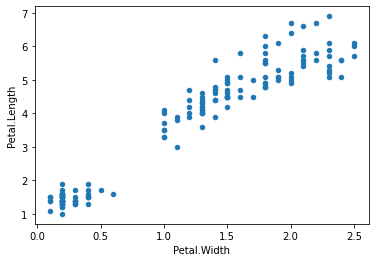

In [285]:
# 상관 계수가 높을때
iris_df.plot(x = "Petal.Width", y = 'Petal.Length', kind='scatter') 

<AxesSubplot:xlabel='Sepal.Width', ylabel='Sepal.Length'>

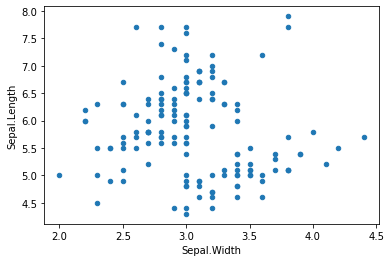

In [286]:
# 상관 계수가 낮을때
iris_df.plot(x = "Sepal.Width", y = 'Sepal.Length', kind='scatter') 